In [1]:
import sys
import os
import glob as gb
sys.path.append('/home/cbenitez/')
import MTmp as mt
import matplotlib.pyplot as plt
import numpy as np
import oort_cons as oc

amrviewer GUI ImportError : are WxPython and PyTables correctly installed?


In [26]:
def phase_space(xxvvdds,ccc_galac,vvv_galac,xvLSRs,ic,quivscale=2000,velscale=mt.C.kpc.express(mt.C.km)):

    xxvvdd = xxvvdds[ic]
    cc_galac,vv_galac = ccc_galac[ic],vvv_galac[ic]
    dd = xxvvdd[:,-1]
    cc = np.array([xv[:3:] for xv in xxvvdd])
    vv = np.array([xv[3:6] for xv in xxvvdd])
    xvLSR = xvLSRs[ic]
    fig, axs = plt.subplots(3, 2, sharex=False,figsize=(12,12))


    axs[0,0].scatter(cc_galac[:,1],vv_galac[:,0]/cc_galac[:,0],s=map(int,dd*10),c='blue',alpha=.5,label="data")
    axs[1,0].scatter(cc_galac[:,1],vv_galac[:,1]/cc_galac[:,0],s=map(int,dd*10),c='blue',alpha=.5,label="data")
    axs[2,0].scatter(cc_galac[:,1],vv_galac[:,2]/cc_galac[:,0],s=map(int,dd*10),c='blue',alpha=.5,label="data")

    axs[0,1].scatter(cc[:,0],cc[:,1],s=map(int,dd*10),c='blue',alpha=.3,label="data")
    axs[1,1].scatter(cc[:,0],cc[:,2],s=map(int,dd*10),c='blue',alpha=.3,label="data")
    axs[2,1].scatter(cc[:,1],cc[:,2],s=map(int,dd*10),c='blue',alpha=.3,label="data")
    axs[0,1].quiver(cc[:,0],cc[:,1],(vv[:,0]-xvLSR[3])*velscale,(vv[:,1]-xvLSR[4])*velscale,angles='xy', units='width', scale=quivscale,color="k",alpha=.3)
    axs[1,1].quiver(cc[:,0],cc[:,2],(vv[:,0]-xvLSR[3])*velscale,(vv[:,2]-xvLSR[5])*velscale,angles='xy', units='width', scale=quivscale,color="k",alpha=.3)
    axs[2,1].quiver(cc[:,1],cc[:,2],(vv[:,1]-xvLSR[4])*velscale,(vv[:,2]-xvLSR[5])*velscale,angles='xy', units='width', scale=quivscale,color="k",alpha=.3)
    axs[0,1].quiver([xvLSR[0]],[xvLSR[1]],[xvLSR[3]*velscale],[xvLSR[4]*velscale],angles='xy', units='width', scale=quivscale,color="r",alpha=1)
    axs[1,1].quiver([xvLSR[0]],[xvLSR[2]],[xvLSR[3]*velscale],[xvLSR[5]*velscale],angles='xy', units='width', scale=quivscale,color="r",alpha=1)
    axs[2,1].quiver([xvLSR[1]],[xvLSR[2]],[xvLSR[4]*velscale],[xvLSR[5]*velscale],angles='xy', units='width', scale=quivscale,color="r",alpha=1)
    axs[0,1].scatter([xvLSR[0]],[xvLSR[1]],color="r",alpha=1,s=30,marker="X")
    axs[1,1].scatter([xvLSR[0]],[xvLSR[2]],color="r",alpha=1,s=30,marker="X")
    axs[2,1].scatter([xvLSR[1]],[xvLSR[2]],color="r",alpha=1,s=30,marker="X")


    axs[0,0].locator_params(nbins=7)
    axs[1,0].locator_params(nbins=7)
    axs[2,0].locator_params(nbins=7)
    axs[0,0].set_ylabel(r'$v_r$',fontsize=24)
    axs[1,0].set_ylabel(r'$v_{\ell}$',fontsize=24)
    axs[2,0].set_ylabel(r'$v_{b}$',fontsize=24)
    axs[0,0].set_xlabel(r'$\ell$  [deg]',fontsize=24)
    axs[1,0].set_xlabel(r'$\ell$  [deg]',fontsize=24)
    axs[2,0].set_xlabel(r'$\ell$  [deg]',fontsize=24)

    axs[0,1].set_ylabel(r'$Y$ [kpc]',fontsize=24)
    axs[1,1].set_ylabel(r'$Z$ [kpc]',fontsize=24)
    axs[2,1].set_ylabel(r'$Z$ [kpc]',fontsize=24)
    axs[0,1].set_xlabel(r'$X$ [kpc]',fontsize=24)
    axs[1,1].set_xlabel(r'$X$ [kpc]',fontsize=24)
    axs[2,1].set_xlabel(r'$Y$ [kpc]',fontsize=24)

    axs[0,0].set_xticks([l for l in np.linspace(np.pi,-np.pi,9)])
    axs[0,0].set_xticklabels(labels=[str(int(l*180/np.pi)) for l in np.linspace(np.pi,-np.pi,9)])
    axs[1,0].set_xticks([l for l in np.linspace(np.pi,-np.pi,9)])
    axs[1,0].set_xticklabels(labels=[str(int(l*180/np.pi)) for l in np.linspace(np.pi,-np.pi,9)])
    axs[2,0].set_xticks([l for l in np.linspace(np.pi,-np.pi,9)])
    axs[2,0].set_xticklabels(labels=[str(int(l*180/np.pi)) for l in np.linspace(np.pi,-np.pi,9)])

    axs[0,0].xaxis.set_tick_params(labelsize=16)
    axs[1,0].xaxis.set_tick_params(labelsize=16)
    axs[2,0].xaxis.set_tick_params(labelsize=16)
    axs[0,0].yaxis.set_tick_params(labelsize=16)
    axs[1,0].yaxis.set_tick_params(labelsize=16)
    axs[2,0].yaxis.set_tick_params(labelsize=16)

    axs[0,1].xaxis.set_tick_params(labelsize=16)
    axs[1,1].xaxis.set_tick_params(labelsize=16)
    axs[2,1].xaxis.set_tick_params(labelsize=16)
    axs[0,1].yaxis.set_tick_params(labelsize=16)
    axs[1,1].yaxis.set_tick_params(labelsize=16)
    axs[2,1].yaxis.set_tick_params(labelsize=16)

    axs[0,1].axis('equal')
    axs[1,1].axis('equal')
    axs[2,1].axis('equal')

    #axs[0,1].set_xlim(xv_LSR[0]-1,xv_LSR[0]+1)
    #axs[0,1].set_ylim(xv_LSR[1]-1,xv_LSR[1]+1)
    #axs[1,1].set_xlim(xv_LSR[0]-1,xv_LSR[0]+1)
    #axs[1,1].set_ylim(xv_LSR[2]-1,xv_LSR[2]+1)
    #axs[2,1].set_xlim(xv_LSR[1]-1,xv_LSR[1]+1)
    #axs[2,1].set_ylim(xv_LSR[2]-1,xv_LSR[2]+1)

    plt.tight_layout(w_pad=2.)


____

In [3]:
ls /fs/nas14/other0/cbenitez/partsSim

info_mp_marbles_14032021-122643
info_mp_marbles_15032021-003752
MCMCrun_mp_marbles_15032021-003752_newW.npy
MCMCrun_mp_marbles_15032021-003752_ringsW2.npy
MCMCrun_mp_marbles_15032021-003752_ringsW.npy
mp_marbles_14032021-122643
mp_marbles_14032021-122643LSR
mp_marbles_14032021-122643_script.py
mp_marbles_15032021-003752
mp_marbles_15032021-003752LSR
mp_marbles_15032021-003752_MCMCacumW.npy
mp_marbles_15032021-003752_script.py


In [4]:
DFparts,DFlsrs = mt.read_dat("/fs/nas14/other0/cbenitez/partsSim/",'mp_marbles_15032021-003752') 

In [5]:
DFparts.creation_time=DFparts.creation_time*mt.C.s.express(mt.C.Myr)
DFlsrs.creation_time=DFlsrs.creation_time*mt.C.s.express(mt.C.Myr)

In [6]:
np.unique(DFparts["output"])

array([11, 12, 13, 14, 15, 16])

In [7]:
tt = np.unique(DFparts.creation_time)
delta_tt = np.diff(tt)
xv_LSRs = [np.array([ 7.31874645e+00,  1.68672635e-01,  0.00000000e+00,  1.63837225e-16,-7.10893683e-15,  0.00000000e+00])]
for dt in delta_tt:
    xv_LSR = xv_LSRs[-1]
    alpha = np.linalg.norm(xv_LSR[3::])/np.linalg.norm(xv_LSR[:3:])*(dt)*mt.C.Myr.express(mt.C.s)
    xv_LSR = list(oc.Rot_mat(-alpha,[0,0,1]).dot(xv_LSRs[-1][:3:]))
    xv_LSR.extend(mt.vel_circ(xv_LSR,mt.force_T))
    xv_LSR = np.array(xv_LSR)
    xv_LSRs.append(xv_LSR)

In [8]:
tt

array([ 3.25060325,  4.7216629 ,  6.45561442,  7.98573204,  9.55898311,
       11.13404672])

In [9]:
xv_LSRs

[array([ 7.31874645e+00,  1.68672635e-01,  0.00000000e+00,  1.63837225e-16,
        -7.10893683e-15,  0.00000000e+00]),
 array([ 7.31891031e+00, -1.61405962e-01,  0.00000000e+00, -1.56778869e-16,
        -7.10909599e-15, -0.00000000e+00]),
 array([ 7.30000000e+00, -5.50000000e-01,  0.00000000e+00, -5.34232916e-16,
        -7.09072780e-15, -0.00000000e+00]),
 array([ 7.26618505e+00, -8.91658470e-01,  0.00000000e+00, -8.66096917e-16,
        -7.05788223e-15, -0.00000000e+00]),
 array([ 7.21475414e+00, -1.24089597e+00,  0.00000000e+00, -1.20532267e-15,
        -7.00792571e-15, -0.00000000e+00]),
 array([ 7.14645945e+00, -1.58764522e+00,  0.00000000e+00, -1.54213152e-15,
        -6.94158886e-15, -0.00000000e+00])]

In [10]:
np.unique(DFparts.output)

array([11, 12, 13, 14, 15, 16])

____

# Todas

In [23]:
#subDFs = [DFparts[(DFparts.output==opc) & (DFparts.creation_time==tt[opc-12])] for opc in [11,12,13,14]]
subDFs = [DFparts[(DFparts.output==opc)] for opc in [11,12,13,14]]
xxvvdds = [np.array(subDF[['x','y','z','vx','vy','vz','dens']]) for subDF in subDFs]
print [len(xvd)  for xvd in xxvvdds]

ccc_galac = []
vvv_galac = []
ddd = []
for ic in range(len(subDFs)):
    xv_LSR = xv_LSRs[ic]
    xxvvdd = xxvvdds[ic]
    r_LSR = np.array(xv_LSR[:3:])
    v_LSR = np.array(xv_LSR[3::])*mt.C.kpc.express(mt.C.km)
    cc = np.array([xv[:3:] for xv in xxvvdd])
    vv = np.array([xv[3:6] for xv in xxvvdd])
    dd = np.array([xv[-1] for xv in xxvvdd])
    vvkm = vv*mt.C.kpc.express(mt.C.km)
    vv_galac = np.array([oc.vcart2vgalacticOC(cc[i],r_LSR,vvkm[i],v_LSR) for i in range(len(vvkm))])
    cc_galac = np.array([oc.cart2galactic(c,r_LSR) for c in cc])
    ccc_galac.append(cc_galac)
    vvv_galac.append(vv_galac)
    ddd.append(dd)

[82, 1040, 3317, 6535]


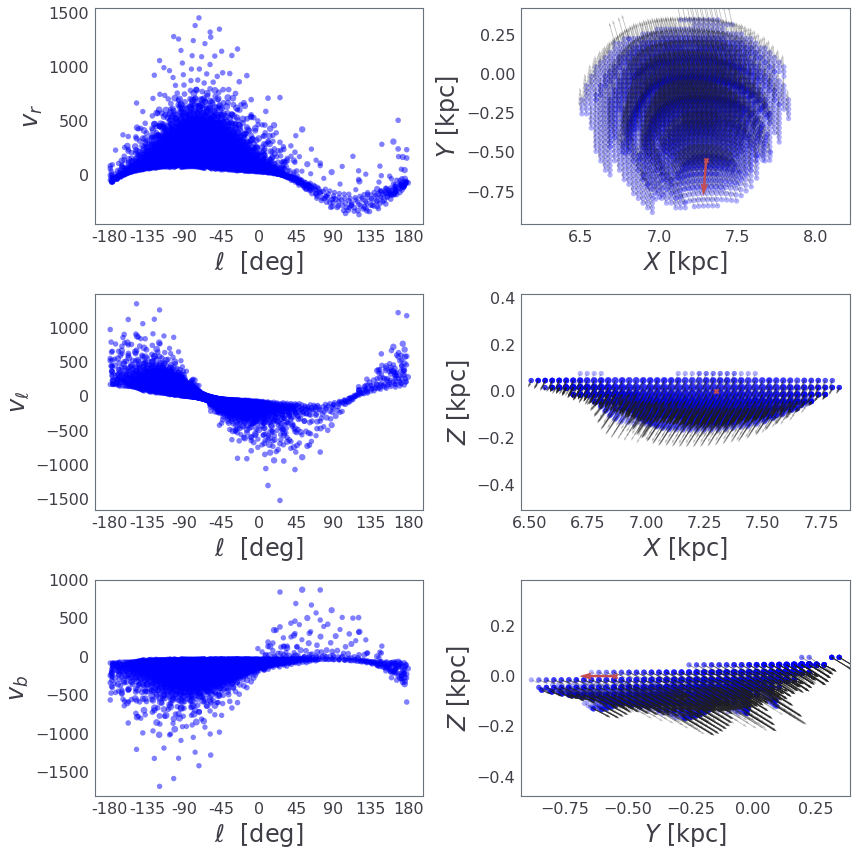

In [28]:
phase_space(xxvvdds,ccc_galac,vvv_galac,xv_LSRs,2,quivscale=2000)

______

# sub Ids

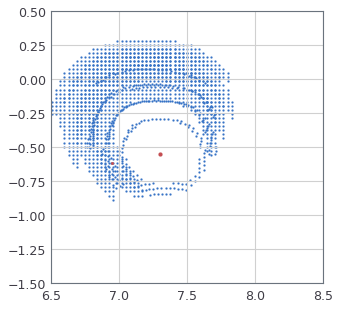

In [29]:
opc = 13
subDF = DFparts[(DFparts["output"]==opc) &\
                ((DFparts.creation_time==tt[0]) |
                 (DFparts.creation_time==tt[1]) |
                 (DFparts.creation_time==tt[2]) |
                 (DFparts.creation_time==tt[3])) &\
                (abs(DFparts.z)<.07)]
#subDF = DFparts[(DFparts["output"]==opc)]
plt.figure(figsize=(5,5))
plt.scatter(subDF.x,subDF.y,s=4)
plt.scatter(DFlsrs[DFlsrs.output==opc].x,DFlsrs[DFlsrs.output==opc].y,s=8,c="r")
plt.scatter([xv_LSRs[opc-11][0]],[xv_LSRs[opc-11][1]],s=16,c="r")
plt.gca().set_aspect('equal')
plt.xlim(6.5,8.5)
plt.ylim(-1.5,.5)
plt.grid(True)
plt.show()

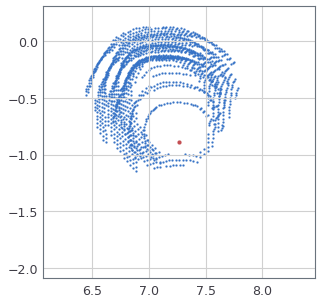

In [30]:
opc = 14
#itc = 14-11
array_ids = np.array(subDF.id)
subDF2 = DFparts[(DFparts["output"]==opc)]
subDF2 = subDF2[[i in array_ids for i in subDF2.id]]
#subDF = DFparts[(DFparts["output"]==opc)]
plt.figure(figsize=(5,5))
plt.scatter(subDF2.x,subDF2.y,s=4)
plt.scatter([xv_LSRs[opc-11][0]],[xv_LSRs[opc-11][1]],s=16,c="r")
plt.gca().set_aspect('equal')
plt.xlim(xv_LSRs[opc-11][0]-1.2,xv_LSRs[opc-11][0]+1.2)
plt.ylim(xv_LSRs[opc-11][1]-1.2,xv_LSRs[opc-11][1]+1.2)
plt.grid(True)
plt.show()

In [31]:
subDFs = [DFparts[(DFparts["output"]==opc)] for opc in [12,13,14]]
subDFs[1] = subDFs[1][(abs(subDFs[1].z)<.07)]
array_ids = np.array(subDFs[1].id)
for j in range(3):
    subDFs[j] = subDFs[j][[i in array_ids for i in subDFs[j].id]]

#subDFs = [DFparts[(DFparts["output"]==opc) & (DFparts.creation_time==tt[opc-11])] for opc in [11,12,13,14]]
xxvvdds = [np.array(subDF[['x','y','z','vx','vy','vz','dens']]) for subDF in subDFs]
print [len(xvd)  for xvd in xxvvdds]


ccc_galac = []
vvv_galac = []
ddd = []
for ic in range(3):
    xv_LSR = xv_LSRs[ic+1]
    xxvvdd = xxvvdds[ic]
    r_LSR = np.array(xv_LSR[:3:])
    v_LSR = np.array(xv_LSR[3::])*mt.C.kpc.express(mt.C.km)
    cc = np.array([xv[:3:] for xv in xxvvdd])
    vv = np.array([xv[3:6] for xv in xxvvdd])
    dd = np.array([xv[-1] for xv in xxvvdd])
    vvkm = vv*mt.C.kpc.express(mt.C.km)
    vv_galac = np.array([oc.vcart2vgalacticOC(cc[i],r_LSR,vvkm[i],v_LSR) for i in range(len(vvkm))])
    cc_galac = np.array([oc.cart2galactic(c,r_LSR) for c in cc])
    ccc_galac.append(cc_galac)
    vvv_galac.append(vv_galac)
    ddd.append(dd)

[334, 1681, 1681]


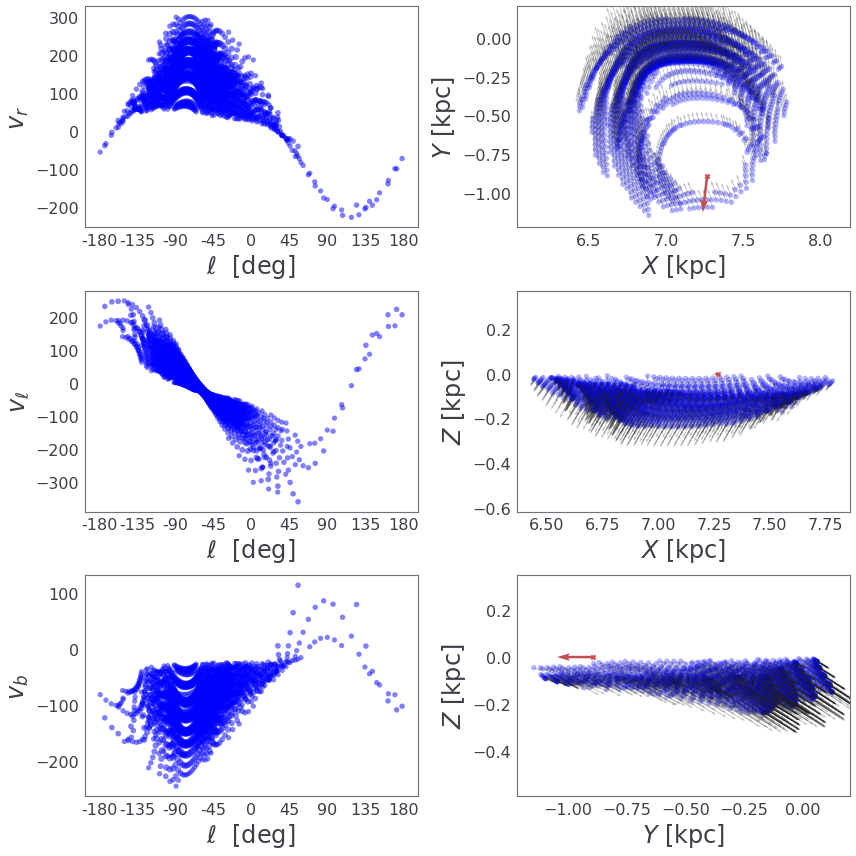

In [34]:
phase_space(xxvvdds,ccc_galac,vvv_galac,xv_LSRs[1::],2,quivscale=2000)